# Aula: Desvendando a Regressão Logística

Olá! Nesta aula, vamos explorar um dos algoritmos mais importantes e utilizados em aprendizado de máquina para problemas de classificação: a **Regressão Logística**.

## 1. O que é Regressão Logística?

A Regressão Logística é uma técnica estatística usada para prever a probabilidade de um evento acontecer. Pense nela como uma ferramenta para responder perguntas de "sim" ou "não", ou para classificar algo dentro de um conjunto de categorias.

Diferente da Regressão Linear, que prevê um valor contínuo (como o preço de uma casa), a Regressão Logística é usada quando a resposta que buscamos é uma **categoria**, como:

* Um e-mail é *spam* ou *não spam*?
* Um cliente irá *comprar* ou *não comprar*?
* Um tumor é *maligno* ou *benigno*?

Para fazer isso, o modelo calcula a probabilidade do resultado pertencer a uma classe específica, sempre resultando em um valor entre 0 e 1 (ou 0% e 100%).

## 2. A Grande Diferença: Regressão Logística vs. Linear

A principal diferença está no tipo de variável que cada modelo tenta prever.

| Característica | Regressão Linear | Regressão Logística |
| :--- | :--- | :--- |
| **Variável de Saída** | Contínua (ex: preço, altura) | Categórica (ex: sim/não, doente/saudável) |
| **Gráfico** | Modela uma **linha reta** | Modela uma **curva em "S" (sigmoide)** |
| **Função Principal** | Identidade | **Logit** (que veremos a seguir) |



## 3. O Coração do Modelo: A Mágica da Função Sigmoide

Imagine que nosso modelo de regressão, internamente, trabalha como um motor que calcula uma "pontuação" para cada dado. Uma pontuação alta pode significar que um evento tem mais chance de acontecer, e uma baixa, menos chance.

O problema? Essa pontuação pode ser qualquer número: -500, 8, 0.2, 1200... Como transformamos isso em uma probabilidade, que deve sempre estar entre 0% e 100%?

É aqui que entra a estrela do show: a **Função Sigmoide**.

Pense nela como um **tradutor universal de pontuação para probabilidade**. Ela tem uma única e crucial missão: pegar qualquer número que o "motor" do modelo produz e convertê-lo para um valor entre 0 e 1.

### Como Funciona essa "Tradução"?

A Função Sigmoide segue três regras muito simples e intuitivas:

* **Se a pontuação é um número positivo muito grande (ex: 10, 50, 1000):** A Sigmoide o traduz para uma probabilidade muito próxima de 1 (ou 100%). Ela entende isso como "evento muito provável".
* **Se a pontuação é um número negativo muito grande (ex: -10, -50, -1000):** A Sigmoide o traduz para uma probabilidade muito próxima de 0 (ou 0%). Ela entende isso como "evento muito improvável".
* **Se a pontuação é exatamente 0:** A Sigmoide o traduz para exatamente 0.5 (ou 50%). Este é o ponto de total incerteza, o famoso "50/50".

É essa elegante curva em formato de "S" que dá à Regressão Logística o poder de classificar. Ela transforma uma pontuação abstrata em uma probabilidade concreta que podemos usar para tomar uma decisão final (por exemplo, se a probabilidade for maior que 50%, classificamos como "sim").



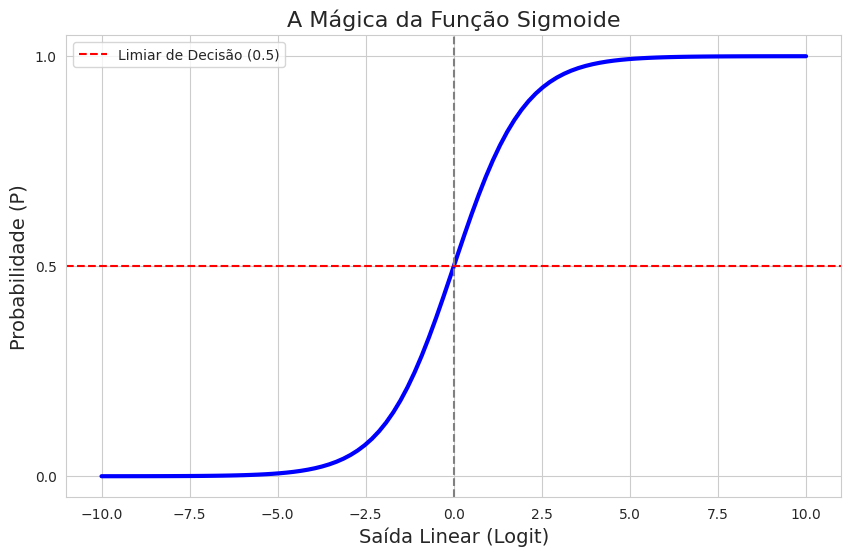

Observe como valores muito negativos em 'z' viram probabilidade perto de 0,
e valores muito positivos viram probabilidade perto de 1.


In [13]:
# Célula extra para explorar a Função Sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure(figsize=(10, 6))
plt.plot(z, p, color='blue', lw=3)
plt.axhline(0.5, color='red', linestyle='--', label='Limiar de Decisão (0.5)')
plt.axvline(0, color='grey', linestyle='--')
plt.yticks([0.0, 0.5, 1.0])
plt.xlabel("Saída Linear (Logit)", fontsize=14)
plt.ylabel("Probabilidade (P)", fontsize=14)
plt.title("A Mágica da Função Sigmoide", fontsize=16)
plt.legend()
plt.show()

print("Observe como valores muito negativos em 'z' viram probabilidade perto de 0,")
print("e valores muito positivos viram probabilidade perto de 1.")

## 4. Os Tipos de Regressão Logística

A Regressão Logística é flexível e se adapta ao número de categorias que você precisa prever. Existem três variações principais:

1.  **Regressão Logística Binária:**
    * **O que faz?** Usada quando há apenas dois resultados possíveis.
    * **Exemplo:** Prever se um aluno será aprovado (1) ou reprovado (0). A maioria dos exemplos que vemos no dia a dia usa este tipo.

2.  **Regressão Logística Multinomial:**
    * **O que faz?** Aplicada quando a variável de saída tem três ou mais categorias, mas sem uma ordem específica entre elas.
    * **Exemplo:** Prever qual o meio de transporte um morador de uma cidade grande prefere (Carro, Ônibus, Metrô, Bicicleta).

3.  **Regressão Logística Ordinal:**
    * **O que faz?** Utilizada quando as categorias de saída têm uma ordem intrínseca ou uma hierarquia.
    * **Exemplo:** Classificar a avaliação de um filme em uma escala de 1 a 5 estrelas, onde 5 é claramente melhor que 4.

---


## Uma Análise Aprofundada do Dataset de Câncer de Mama de Wisconsin

Para este projeto, o conjunto de dados selecionado é o "Breast Cancer Wisconsin (Diagnostic) Data Set", uma base de dados clássica e amplamente utilizada em problemas de classificação binária, disponibilizada através do módulo `sklearn.datasets` da biblioteca Scikit-Learn. Sua principal aplicação é na área médica, especificamente no auxílio ao diagnóstico do câncer de mama, onde o objetivo é prever se um tumor é maligno ou benigno a partir de características extraídas de imagens de massas mamárias.

### Origem e Coleta de Dados

O dataset foi criado pelo Dr. William H. Wolberg, W. Nick Street e Olvi L. Mangasarian e tem origem em imagens digitalizadas de aspirados por agulha fina (FNA - Fine Needle Aspirate) de massas mamárias. A FNA é um procedimento de biópsia menos invasivo que permite a análise de uma pequena quantidade de tecido de um tumor. As características presentes no conjunto de dados descrevem os núcleos celulares visualizados nessas imagens.

### Descrição Detalhada dos Atributos

O conjunto de dados é composto por 569 amostras, cada uma com 30 características (atributos) numéricas e uma variável alvo. Não há valores ausentes nos dados.

A **variável alvo**, denominada `target`, é binária e indica o diagnóstico do tumor, onde:
* **0** representa um tumor **maligno**.
* **1** representa um tumor **benigno**.

O dataset apresenta uma distribuição de 357 casos benignos e 212 malignos.

Os 30 atributos são derivados de dez características de valor real calculadas para cada núcleo celular. Para cada uma dessas características, foram computadas três métricas: a média (`mean`), o erro padrão (`standard error`) e o "pior" valor (`worst`), que corresponde à média dos três maiores valores observados na imagem. Isso totaliza os 30 atributos preditivos.

As dez características base são:

| Característica | Descrição |
| :--- | :--- |
| **Radius (Raio)** | Média das distâncias do centro aos pontos no perímetro do núcleo celular. |
| **Texture (Textura)** | Desvio padrão dos valores em escala de cinza da imagem do núcleo. |
| **Perimeter (Perímetro)**| O comprimento do contorno do núcleo celular. |
| **Area (Área)** | A área do núcleo celular. |
| **Smoothness (Suavidade)** | Variação local nos comprimentos do raio. |
| **Compactness (Compacidade)** | Calculado pela fórmula: (perímetro²) / (área - 1.0). |
| **Concavity (Concavidade)** | A severidade das porções côncavas do contorno. |
| **Concave Points (Pontos Côncavos)** | O número de porções côncavas no contorno. |
| **Symmetry (Simetria)** | A simetria do núcleo celular. |
| **Fractal Dimension (Dimensão Fractal)**| Uma aproximação do "contorno da costa". |

### Relevância e Aplicação em Machine Learning

A importância deste dataset reside em sua utilidade para o desenvolvimento de modelos de diagnóstico e prognóstico do câncer de mama. Ao analisar as características extraídas das imagens de FNA, profissionais da saúde e pesquisadores podem criar modelos de aprendizado de máquina para automatizar ou auxiliar no diagnóstico. A principal aplicação é, portanto, a **classificação binária**, onde os modelos são treinados para prever se um tumor é maligno (canceroso) ou benigno (não canceroso).



In [1]:
# Importação das Bibliotecas Necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos
sns.set_style('whitegrid')

# CARREGAMENTO DO DATASET

In [2]:
from sklearn.datasets import load_breast_cancer

# Carregar o dataset de câncer de mama
cancer = load_breast_cancer()

# Criar um DataFrame com os dados
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# ANÁLISE EXPLORATÓRIA DE DADOS (AED)

In [14]:
# Visualização das primeiras entradas do dataset
print("Visualização das primeiras 5 entradas do dataset:")
display(df.head())

Visualização das primeiras 5 entradas do dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [15]:
# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
df.info()


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64

In [16]:

# Estatísticas descritivas do dataset
print("\nEstatísticas descritivas do dataset:")
display(df.describe())



Estatísticas descritivas do dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
# Verificação de valores nulos
print("\nVerificação de valores nulos:")
print(df.isnull().sum())



Verificação de valores nulos:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


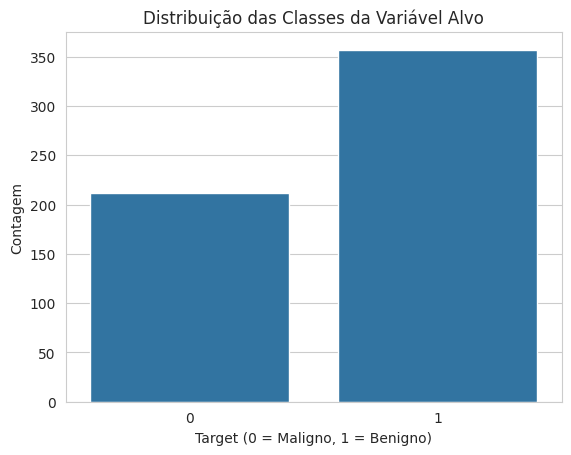

In [18]:
# Distribuição da variável alvo
sns.countplot(x='target', data=df)
plt.title('Distribuição das Classes da Variável Alvo')
plt.xlabel('Target (0 = Maligno, 1 = Benigno)')
plt.ylabel('Contagem')
plt.show()


In [19]:

# Observação sobre o balanceamento das classes
print("\nContagem de classes:")
print(df['target'].value_counts())



Contagem de classes:
target
1    357
0    212
Name: count, dtype: int64


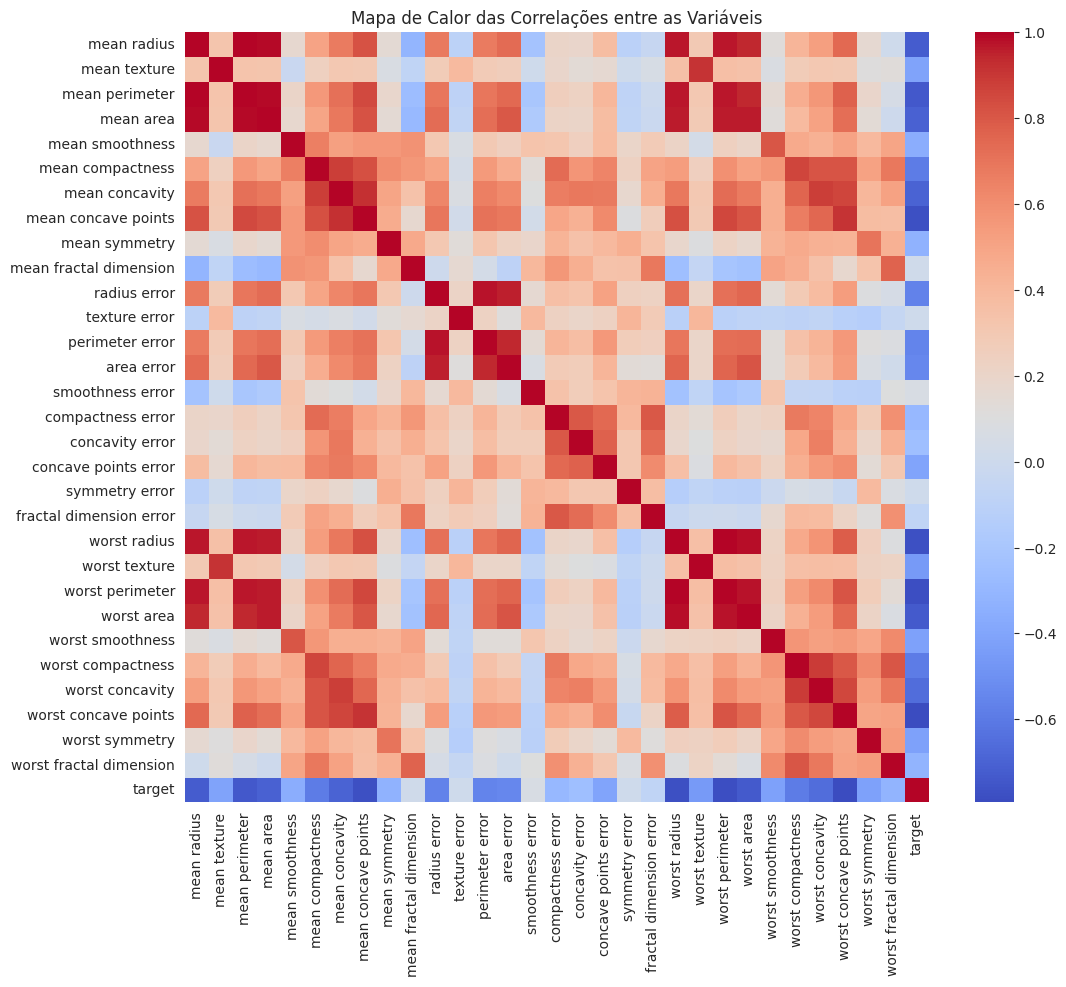


Correlação das características com a variável alvo:
worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
Name: target, dtype: float64


In [20]:
# Análise de correlação
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações entre as Variáveis')
plt.show()

# Seleção das características mais correlacionadas com a variável alvo
print("\nCorrelação das características com a variável alvo:")
corr_target = abs(corr["target"].drop('target'))
print(corr_target.sort_values(ascending=False).head(10))

# PREPARAÇÃO DOS DADOS PARA O MODELO

In [4]:
# Separação das Variáveis Independentes (X) e Dependente (y)
X = df.drop('target', axis=1)
y = df['target']

# Divisão dos Dados em Conjuntos de Treino e Teste
from sklearn.model_selection import train_test_split

# Usando stratify=y para manter a proporção das classes nos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verificação das dimensões dos conjuntos
print(f"\nDimensão do conjunto de treino: {X_train.shape}")
print(f"Dimensão do conjunto de teste: {X_test.shape}")


Dimensão do conjunto de treino: (455, 30)
Dimensão do conjunto de teste: (114, 30)


# NORMALIZAÇÃO DOS DADOS

In [23]:
from sklearn.preprocessing import StandardScaler

# Criação do objeto StandardScaler
scaler = StandardScaler()

# Ajuste do scaler apenas nos dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Aplicação da transformação nos dados de teste
X_test_scaled = scaler.transform(X_test)

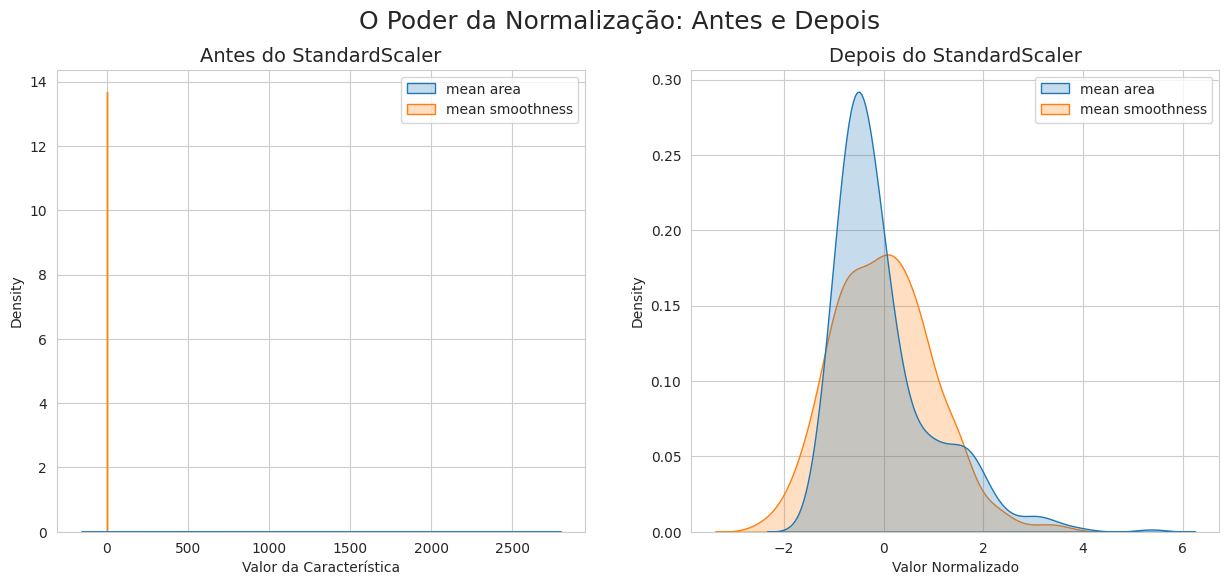

In [24]:

# Criando um DataFrame temporário para facilitar a plotagem
df_scaled_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Escolhendo algumas features com escalas bem diferentes (baseado no df.describe())
features_to_plot = ['mean area', 'mean smoothness']

# Configurando a figura
plt.figure(figsize=(15, 6))
plt.suptitle('O Poder da Normalização: Antes e Depois', fontsize=18)

# Gráfico ANTES
plt.subplot(1, 2, 1)
sns.kdeplot(data=X_train[features_to_plot], fill=True)
plt.title('Antes do StandardScaler', fontsize=14)
plt.xlabel('Valor da Característica')

# Gráfico DEPOIS
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_scaled_train[features_to_plot], fill=True)
plt.title('Depois do StandardScaler', fontsize=14)
plt.xlabel('Valor Normalizado')

plt.show()



#### Colocando Tudo na Mesma Régua

Observe a mágica acontecer! No gráfico da esquerda, a mean area (com valores altos) domina completamente a visualização, enquanto a mean smoothness (com valores pequenos) fica espremida perto do zero.

No gráfico da direita, após a normalização, ambas as características estão centralizadas em torno de zero e com uma dispersão comparável. Agora, o modelo pode avaliar a importância de cada uma de forma justa, sem ser influenciado pela escala original dos dados.

# TREINAMENTO DO MODELO DE REGRESSÃO LOGÍSTICA

In [6]:
from sklearn.linear_model import LogisticRegression

# Criação do modelo de regressão logística
logreg = LogisticRegression(max_iter=10000)

# Treinamento do modelo com os dados de treino escalonados
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=10000)

# AVALIAÇÃO DO MODELO


Relatório de Classificação (Modelo Padrão):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



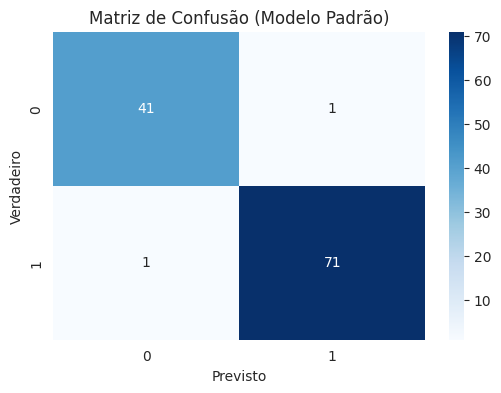

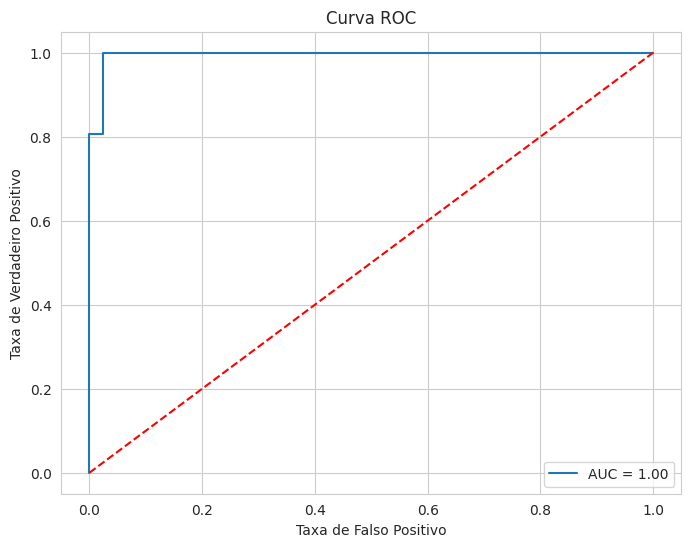

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Previsões nos dados de teste
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]

# Relatório de classificação do modelo
print("\nRelatório de Classificação (Modelo Padrão):")
print(classification_report(y_test, y_pred))

# Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Modelo Padrão)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


# AJUSTE DE HIPERPARÂMETROS COM GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV

# Definição da grade de parâmetros a serem testados
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

# Criação do objeto GridSearchCV
grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, refit=True, verbose=2, cv=5)

# Ajuste do GridSearchCV aos dados de treino
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l2, s

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=2)

# RESULTADOS DO GridSearchCV

In [9]:
# Melhor estimador e parâmetros encontrados
print("\nMelhores Parâmetros Encontrados pelo GridSearchCV:")
print(grid.best_params_)
print("\nMelhor Estimador:")
print(grid.best_estimator_)


Melhores Parâmetros Encontrados pelo GridSearchCV:
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Melhor Estimador:
LogisticRegression(C=0.1, max_iter=10000)


# AVALIAÇÃO DO MODELO OTIMIZADO


Relatório de Classificação (Modelo Otimizado):
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



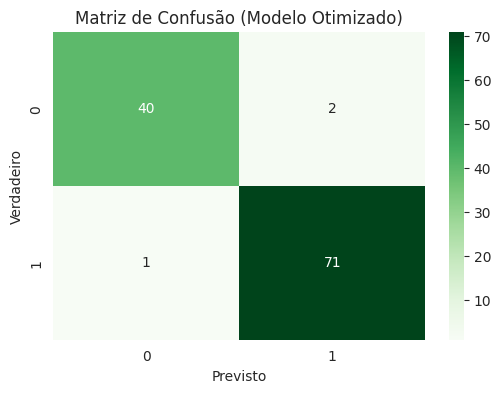

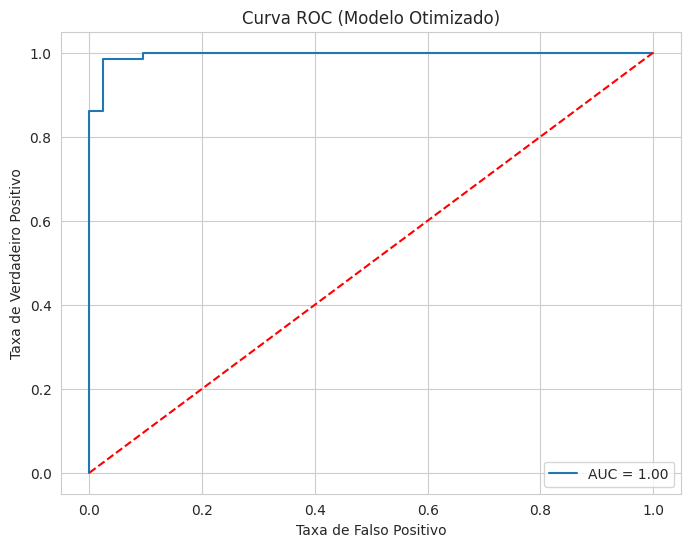

In [10]:
# Previsões com o melhor modelo encontrado
grid_predictions = grid.predict(X_test_scaled)
grid_predictions_proba = grid.predict_proba(X_test_scaled)[:,1]

# Relatório de classificação do modelo otimizado
print("\nRelatório de Classificação (Modelo Otimizado):")
print(classification_report(y_test, grid_predictions))

# Matriz de confusão para o modelo otimizado
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão (Modelo Otimizado)')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# Curva ROC e AUC para o modelo otimizado
fpr, tpr, thresholds = roc_curve(y_test, grid_predictions_proba)
auc = roc_auc_score(y_test, grid_predictions_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0,1],[0,1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC (Modelo Otimizado)')
plt.legend(loc='lower right')
plt.show()

# SALVANDO O MODELO PARA DEPLOY

In [11]:
import joblib

# Salvando o melhor modelo encontrado pelo GridSearchCV
joblib.dump(grid.best_estimator_, 'logreg_cancer_model.pkl')

# Salvando o scaler para uso futuro na normalização de novos dados
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# COMO FAZER UMA PREDIÇÃO INÉDITA COM O MODELO SALVO

In [12]:
# Carregar o modelo e o scaler salvos
model = joblib.load('logreg_cancer_model.pkl')
scaler = joblib.load('scaler.pkl')

# Novo dado para predição (exemplo fictício)
# As características devem estar na mesma ordem que no conjunto de treinamento
import numpy as np
new_data = np.array([[14.0,20.0,90.0,600.0,0.1,0.2,0.3,0.15,0.2,0.05,
                      0.4,1.5,2.5,40.0,0.005,0.03,0.04,0.01,0.02,0.004,
                      16.0,25.0,110.0,800.0,0.15,0.4,0.5,0.2,0.3,0.08]])

# Escalar o novo dado usando o scaler carregado
new_data_scaled = scaler.transform(new_data)

# Fazer a predição com o modelo carregado
prediction = model.predict(new_data_scaled)
prediction_proba = model.predict_proba(new_data_scaled)[:,1]

# Interpretar o resultado
if prediction[0] == 0:
    print("\nO modelo prevê que o tumor é MALIGNO.")
else:
    print("\nO modelo prevê que o tumor é BENIGNO.")

print(f"Probabilidade de ser benigno: {prediction_proba[0]*100:.2f}%")



O modelo prevê que o tumor é MALIGNO.
Probabilidade de ser benigno: 4.55%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Exercício Prático: Predição de Comportamento de Fumantes em Pesquisa de Saúde Pública (Regressão Logística)

## Contexto de Negócio

O **tabagismo** segue como um dos maiores desafios globais de saúde pública, impactando diretamente a mortalidade, morbidade e custos do sistema. Com base em dados demográficos e socioeconômicos, como prever quem tem maior probabilidade de ser fumante?  
Esse insight é vital para direcionamento de políticas públicas, campanhas de prevenção e segmentação de intervenções.

---

## Dataset Utilizado

Utilizaremos o dataset `exercise` do Seaborn, que simula dados de um estudo populacional.  
**Atenção:** Como o dataset original foca hábitos de exercício, você irá adaptá-lo para o contexto de tabagismo — criando uma variável binária `is_smoker`, a partir da coluna existente `diet` (substitua o conceito de “diet” pelo de “smoking status”: `'low fat' = não fumante`, `'no fat' = fumante`).

Esse hack é proposital para exercitar sua capacidade de adaptar dados abertos a contextos reais de negócio.

Código: df['is_smoker'] = df['diet'].apply(lambda x: 1 if x == 'no fat' else 0)

---

## Descrição do Problema

- **Problema:** Prever, a partir de características como idade, sexo, tempo de exercício e tipo de atividade, quais indivíduos têm maior probabilidade de serem fumantes (`is_smoker`).
- **Variável-alvo binária:**  
    - `is_smoker` (0 = Não fumante, 1 = Fumante)
- **Features potenciais:**  
    - `time` (tempo de exercício)
    - `kind` (tipo de atividade)
    - `pulse` (frequência cardíaca)
    - `diet` (convertida para status de fumante)
    - `sex`
    - `id` (identificador, pode ser descartado)

---

## Passo a Passo do Exercício

### 1. Exploração de Dados

- Carregue o dataset `exercise` do Seaborn.
- Realize limpeza (remoção de NaN, ajuste de tipos).
- Adapte a coluna `diet` para criar a variável `is_smoker` conforme explicado.
- Analise as distribuições das variáveis por grupo de fumantes/não fumantes (histogramas, boxplots).
- Investigue o balanceamento de classes.

---

### 2. Modelagem

- Separe os dados em treino/teste (stratify por `is_smoker`).
- Padronize variáveis numéricas.
- Ajuste um modelo de Regressão Logística (`LogisticRegression` do Scikit-learn).
- Calcule e reporte as métricas: **acurácia, precisão, recall, f1, ROC AUC**.
- Plote a matriz de confusão e a curva ROC.

---

### 3. Interpretação

- Analise os coeficientes logísticos: **quais variáveis aumentam a razão de chances de fumar?**
- Explique com exemplos reais o que significa um coeficiente positivo/negativo para cada feature.
- Identifique as variáveis mais influentes.

---

### 4. Discussão

- Comente sobre o impacto de possíveis desbalanceamentos de classes nas métricas.
- Sugira abordagens para mitigar esse problema (pesos, oversampling etc.).
- Avalie limitações do modelo e discuta possíveis vieses.

---

## Perguntas Desafiadoras

1. **Interpretação dos Coeficientes**  
   - Como interpretar o coeficiente logístico de `time` em termos de razão de chances?  
   - O que significa se for negativo?

2. **Influência das Variáveis**  
   - Quais variáveis aumentam substancialmente a chance de ser fumante?  
   - Existe algum efeito inesperado? Justifique.

3. **Desbalanceamento de Classes**  
   - Como o desbalanceamento afeta precisão, recall e ROC AUC?  
   - O modelo está superestimando ou subestimando uma classe?

4. **Visualização e Insights**  
   - Crie gráficos comparativos para ilustrar a diferença entre fumantes e não fumantes.  
   - Apresente um boxplot do tempo de exercício por status de fumante.

---
